Hackaton

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
file_path = "sentimentdataset.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [8]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [9]:
print(df.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [10]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

In [11]:
print(df["Timestamp"].dtype)

datetime64[ns]


In [14]:
# Définition des mots-clés liés au sport
sport_keywords = ["sport", "football", "soccer", "nba", "tennis", "fifa", "olympics", "fitness", "workout"]


In [15]:
# Fonction de filtrage
def is_sport_related(text, hashtags):
    text = str(text).lower()
    hashtags = str(hashtags).lower()
    
    return any(word in text or word in hashtags for word in sport_keywords)

explications: on defini une variable relative au sport, si texte en chaine caractere en maj on passe en minuscule et idem pour les # on passe en minuscule.

In [17]:
# Appliquer le filtre
df["Is_Sport"] = df.apply(lambda row: is_sport_related(row["Text"], row["Hashtags"]), axis=1)


In [18]:
# Conserver uniquement les messages sportifs
df_sport = df[df["Is_Sport"] == True].drop(columns=["Is_Sport"])


In [19]:
df_sport.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
13,13,13,"New year, new fitness goals! 💪 ...",Positive,2023-01-18 18:00:00,FitJourney,Instagram,#NewYear #FitnessGoals,28.0,55.0,USA,2023,1,18,18
23,23,23,Just finished a challenging workout routine. ...,Positive,2023-01-22 09:15:00,FitnessWarrior,Twitter,#Fitness #ChallengeAccepted,20.0,40.0,UK,2023,1,22,9
34,35,36,Winter sports day at the local park. ...,Positive,2023-01-26 14:20:00,WinterSports,Twitter,#WinterSports #Fun,15.0,30.0,Canada,2023,1,26,14
50,51,52,Starting a new fitness challenge tomorrow! 💪 ...,Positive,2023-02-01 08:00:00,FitnessChallenge,Facebook,#FitnessChallenge #NewBeginnings,22.0,45.0,UK,2023,2,1,8


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
# Compter le nombre de sentiments pour le sport
sentiment_counts_sport = df_sport["Sentiment"].value_counts()


nouvelle variable créée qui va recuperer toutes les données en rapport avec la colonne sentiment créée


/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_44673/2409985940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts_sport.index, y=sentiment_counts_sport.values, palette=["green", "red", "gray"])
/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_44673/2409985940.py:2: UserWarning: 
The palette list has fewer values (3) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=sentiment_counts_sport.index, y=sentiment_counts_sport.values, palette=["green", "red", "gray"])


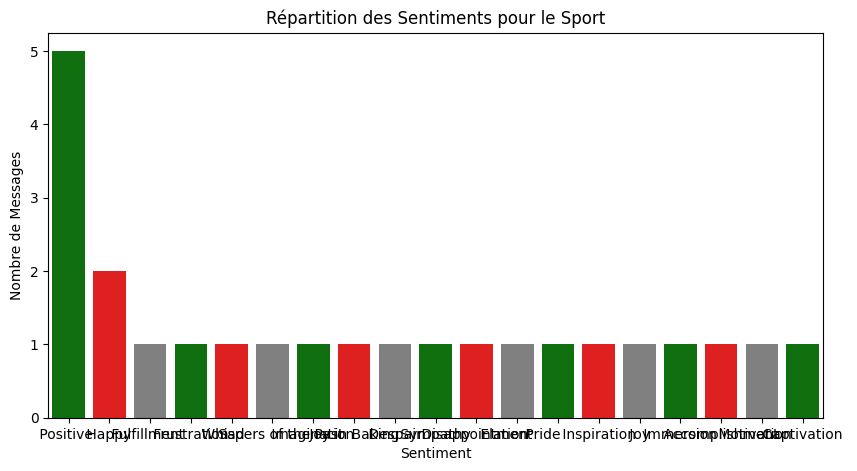

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts_sport.index, y=sentiment_counts_sport.values, palette=["green", "red", "gray"])
plt.title("Répartition des Sentiments pour le Sport")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de Messages")
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

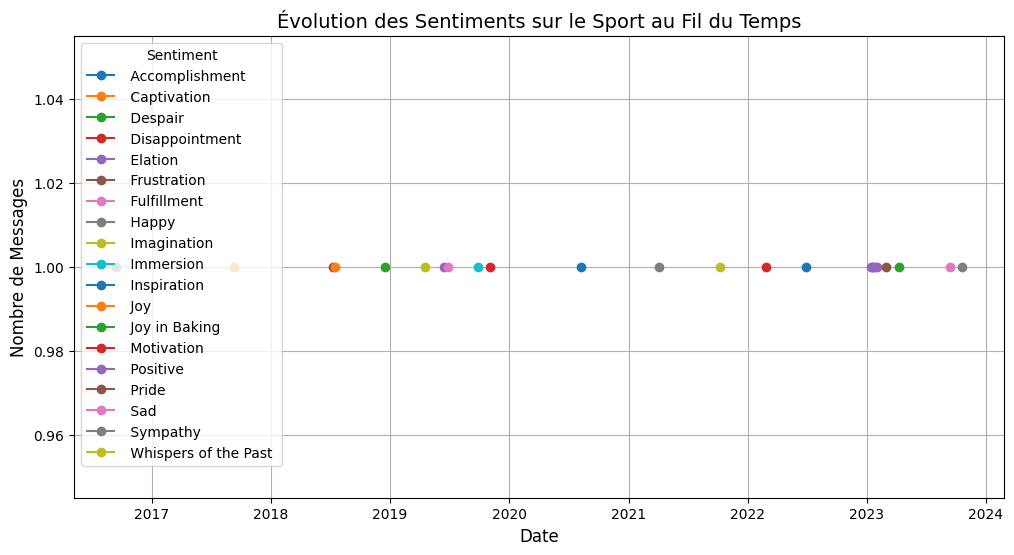

In [27]:
import matplotlib.pyplot as plt

# Vérifier que la colonne Timestamp est bien en datetime
df_sport["Timestamp"] = pd.to_datetime(df_sport["Timestamp"])

# Grouper les données par date et sentiment
sport_sentiment_trend = df_sport.groupby([df_sport["Timestamp"].dt.date, "Sentiment"]).size().unstack()

# Affichage du graphique
plt.figure(figsize=(12, 6))
sport_sentiment_trend.plot(kind="line", marker="o", figsize=(12, 6))

# Personnalisation du graphique
plt.title("Évolution des Sentiments sur le Sport au Fil du Temps", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de Messages", fontsize=12)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(True)
plt.show()


on se rend compte qu'on a pas assez de données pour une étude pertinente donc on va essayer de 'recupérer d'autres dataset

Au lieu d’analyser le sport en général, on va se concentrer sur les figures emblématiques du sport et leur impact sur les discussions publiques. Nous avons donc decidé de tourner le sujet en restant dnas le theme principal:

"Analyse des tendances de sentiment sur Cristiano Ronaldo et Lionel Messi au fil du temps et selon les régions."

Comparaison des tendances de sentiment entre les deux joueurs légendaires.
Analyse temporelle pour voir comment l’opinion évolue après des événements majeurs (transferts, trophées, polémiques…).
Étude des différences régionales pour voir comment Ronaldo et Messi sont perçus dans différents pays.

In [28]:
import pandas as pd

In [30]:
df_ronaldo = pd.read_csv("ronaldo.csv")
df_messi = pd.read_csv("messi.csv")


In [31]:
df_ronaldo

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count
0,1554369938630103040,1413800950846922757,we fell down to with ronaldo and no big team w...,en,2022-08-02T07:34:06.000Z,Twitter for Android,-1,0.0,0.0,0.0
1,1554369912428167170,1331632873338793986,man utd transfer news live frenkie de jong fin...,en,2022-08-02T07:34:00.000Z,Publer.io,-1,0.0,0.0,0.0
2,1554369829414502400,1193232041959186434,r and ronaldinho make me smile when i saw than...,en,2022-08-02T07:33:40.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
3,1554369821432840192,727241246465527809,ronaldo was in the best champions league team ...,en,2022-08-02T07:33:38.000Z,Twitter for Android,-1,0.0,0.0,0.0
4,1554369806714867712,1324146514495741952,from cristiano ronaldo s point of view it is a...,en,2022-08-02T07:33:35.000Z,WordPress.com,-1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
501921,1515850721681416195,597636087,needing a ronaldo hatrick to beat norwich is m...,en,2022-04-18T00:32:29.000Z,Twitter for Android,-1,0.0,0.0,0.0
501922,1515850716518227972,1408952337302011915,this is fake saf said messi is clear,en,2022-04-18T00:32:28.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
501923,1515850679046320134,1303392584727838721,wonderful moment cr,en,2022-04-18T00:32:19.000Z,Twitter for Android,04f58e21fc69d75a,0.0,1.0,0.0
501924,1515850628689547271,1369425436300742656,this isn t about you this is about ronaldo who...,en,2022-04-18T00:32:07.000Z,Twitter for Android,-1,0.0,0.0,0.0


In [32]:
df_messi

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count
0,1554369750175780864,936125201540149248,only lionel messi has more in every category,en,2022-08-02T07:33:21.000Z,Twitter for iPhone,-1,0,0,0
1,1554369704265129984,719822976829546497,balls riqui actually had talent at that time h...,en,2022-08-02T07:33:10.000Z,Twitter for Android,-1,0,0,0
2,1554369683473645568,1124462707355181056,when messi winning everything then you will bl...,en,2022-08-02T07:33:05.000Z,Twitter for Android,-1,0,0,0
3,1554369634563940361,1529031568659980288,messi won the treble with barca in,en,2022-08-02T07:32:54.000Z,Twitter for Android,-1,0,0,0
4,1554369624111734785,1217760894563897345,ronaldo only has the ucl competition as a top ...,en,2022-08-02T07:32:51.000Z,Twitter for Android,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
465218,1515845141667500039,1489843259702665216,it s cringe messi ghosted against ordinary mar...,en,2022-04-18T00:10:19.000Z,Twitter for iPhone,-1,1,0,0
465219,1515845073476460544,1496170748548943875,you have to be an injured man to enjoy leo mes...,en,2022-04-18T00:10:03.000Z,Twitter for iPhone,-1,0,0,0
465220,1515845061975715850,1249801072408956928,unbelievable i can t believe he used to be my ...,en,2022-04-18T00:10:00.000Z,Twitter Web App,-1,0,0,0
465221,1515845043831070721,1505797638595264512,becoz messi play with mbappe neymar verrati an...,en,2022-04-18T00:09:56.000Z,Twitter for Android,-1,0,0,0


In [33]:

print("Valeurs manquantes dans Ronaldo:")
print(df_ronaldo.isnull().sum())

print("\nValeurs manquantes dans Messi:")
print(df_messi.isnull().sum())


Valeurs manquantes dans Ronaldo:
tweet_id          0
author_id         0
content          19
lang              0
date              0
source            0
geo               0
retweet_count     0
like_count        0
quote_count       0
dtype: int64

Valeurs manquantes dans Messi:
tweet_id         0
author_id        0
content          3
lang             0
date             0
source           0
geo              0
retweet_count    0
like_count       0
quote_count      0
dtype: int64


In [34]:
df_ronaldo = df_ronaldo.dropna()
df_messi = df_messi.dropna()


In [35]:
# Convertir la colonne Timestamp en format datetime
df_ronaldo["Timestamp"] = pd.to_datetime(df_ronaldo["Timestamp"], errors="coerce")
df_messi["Timestamp"] = pd.to_datetime(df_messi["Timestamp"], errors="coerce")

KeyError: 'Timestamp'

In [36]:
print("Colonnes dans Ronaldo dataset:", df_ronaldo.columns)
print("Colonnes dans Messi dataset:", df_messi.columns)

Colonnes dans Ronaldo dataset: Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count'],
      dtype='object')
Colonnes dans Messi dataset: Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count'],
      dtype='object')


on ajoute timestamp au lieu de date pour la compatibilité avec le premier data set 


In [37]:
df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
df_messi.rename(columns={"date": "Timestamp"}, inplace=True)


/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_44673/3228568132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_44673/3228568132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messi.rename(columns={"date": "Timestamp"}, inplace=True)


In [38]:
df_ronaldo = df_ronaldo.copy()
df_messi = df_messi.copy()

df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
df_messi.rename(columns={"date": "Timestamp"}, inplace=True)


In [39]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Is_Sport
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,False
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,False
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,True
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,False
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,False
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,False
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,False
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,False


on converti la datatime 

In [40]:
df_ronaldo["Timestamp"] = pd.to_datetime(df_ronaldo["Timestamp"], errors="coerce")
df_messi["Timestamp"] = pd.to_datetime(df_messi["Timestamp"], errors="coerce")


In [41]:
print("Colonnes Ronaldo:", df_ronaldo.columns)
print("Colonnes Messi:", df_messi.columns)


Colonnes Ronaldo: Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count'],
      dtype='object')
Colonnes Messi: Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count'],
      dtype='object')


In [42]:
import pandas as pd

# Ajouter une colonne 'player' pour différencier les tweets
df_ronaldo["player"] = "Ronaldo"
df_messi["player"] = "Messi"

# Concaténer les deux datasets en gardant toutes les colonnes
df_combined = pd.concat([df_ronaldo, df_messi], ignore_index=True)

# Afficher un aperçu du dataset fusionné
print(df_combined.head())
print("Nombre total de tweets combinés :", len(df_combined))


              tweet_id            author_id  \
0  1554369938630103040  1413800950846922757   
1  1554369912428167170  1331632873338793986   
2  1554369829414502400  1193232041959186434   
3  1554369821432840192   727241246465527809   
4  1554369806714867712  1324146514495741952   

                                             content lang  \
0  we fell down to with ronaldo and no big team w...   en   
1  man utd transfer news live frenkie de jong fin...   en   
2  r and ronaldinho make me smile when i saw than...   en   
3  ronaldo was in the best champions league team ...   en   
4  from cristiano ronaldo s point of view it is a...   en   

                  Timestamp               source geo  retweet_count  \
0 2022-08-02 07:34:06+00:00  Twitter for Android  -1            0.0   
1 2022-08-02 07:34:00+00:00            Publer.io  -1            0.0   
2 2022-08-02 07:33:40+00:00   Twitter for iPhone  -1            0.0   
3 2022-08-02 07:33:38+00:00  Twitter for Android  -1            0.

In [43]:
print("Colonnes du dataset combiné :", df_combined.columns)


Colonnes du dataset combiné : Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


on supprime les doublons


In [44]:
df_combined = df_combined.drop_duplicates()


In [45]:
print("Valeurs manquantes après fusion :")
print(df_combined.isnull().sum())


Valeurs manquantes après fusion :
tweet_id         0
author_id        0
content          0
lang             0
Timestamp        0
source           0
geo              0
retweet_count    0
like_count       0
quote_count      0
player           0
dtype: int64


In [46]:
df_combined.dropna(inplace=True)


In [47]:
print(df_combined["content"].unique())  # Vérifie si "content" contient des sentiments


['we fell down to with ronaldo and no big team who wins trophies want him yet you want him at to be our main striker then next year you ll complain about us not winning trophies can t make this shit up'
 'man utd transfer news live frenkie de jong final bid latest cristiano ronaldo admission tielemans interested'
 'r and ronaldinho make me smile when i saw than on the field stats of course cr but loving football r and ronaldinho'
 ... 'you have to be an injured man to enjoy leo messi s downfall'
 'becoz messi play with mbappe neymar verrati and dimaria that too in farmers league and ronaldo plays with fred and maguire in world most competitive league'
 'yes we can never see a player going from a goat debate out of it in just one season goal in messi is and downfall happened cr is amp still a machine ultimate goat']


In [48]:
# Dictionnaire de mapping des sentiments détaillés vers trois catégories principales
sentiment_mapping = {
    "Happy": "Positive", "Excited": "Positive", "Joy": "Positive", "Pride": "Positive",
    "Love": "Positive", "Inspiration": "Positive", "Motivation": "Positive",
    
    "Anger": "Negative", "Frustration": "Negative", "Disappointment": "Negative",
    "Hate": "Negative", "Criticism": "Negative",
    
    "Neutral": "Neutral", "Uncertain": "Neutral"
}

# Appliquer le mapping aux tweets
df_combined["Sentiment"] = df_combined["content"].replace(sentiment_mapping)

# Vérifier les nouvelles valeurs après mapping
print(df_combined["Sentiment"].unique())


['we fell down to with ronaldo and no big team who wins trophies want him yet you want him at to be our main striker then next year you ll complain about us not winning trophies can t make this shit up'
 'man utd transfer news live frenkie de jong final bid latest cristiano ronaldo admission tielemans interested'
 'r and ronaldinho make me smile when i saw than on the field stats of course cr but loving football r and ronaldinho'
 ... 'you have to be an injured man to enjoy leo messi s downfall'
 'becoz messi play with mbappe neymar verrati and dimaria that too in farmers league and ronaldo plays with fred and maguire in world most competitive league'
 'yes we can never see a player going from a goat debate out of it in just one season goal in messi is and downfall happened cr is amp still a machine ultimate goat']


nous avions tenté de coder les 900 000 tweets et malheureusement chargement trop long alors nous decideons d'echantilloner .